# Time series and Bitcoine price predict 💰

## Get the data

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-06-24 22:22:37--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2023-06-24 22:22:37 (7.07 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Import the data

###Pandas

In [2]:
import pandas as pd
df = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                   parse_dates=['Date'], #pares the data column and tell pandas that column 1 is a datetime
                   index_col=['Date'])  #let the Date column be the index column
df

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns={'Closing Price (USD)':'Price'})
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


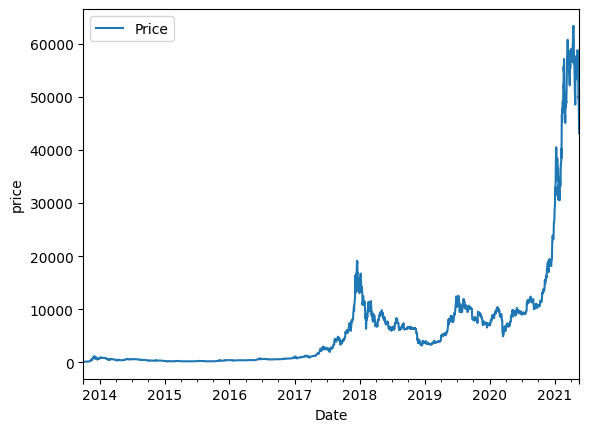

In [5]:
import matplotlib.pyplot as plt
bitcoin_prices.plot()
plt.ylabel('price');

### Python csv

In [6]:
import csv

python_csv = csv.reader('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv')
python_csv

In [7]:
import csv
from datetime import datetime

timesteps = []  #store the dates
btc_price = []  #store the price of bitcoin
with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter=',')
  next(csv_reader) #skip the head line

  for line in csv_reader:
    #timesteps.append(line[1])
    timesteps.append(datetime.strptime(line[1], '%Y-%m-%d'))  #Get the data from the value in coulmn 1 and convert it from string to date format
    btc_price.append(float(line[2]))

In [8]:
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

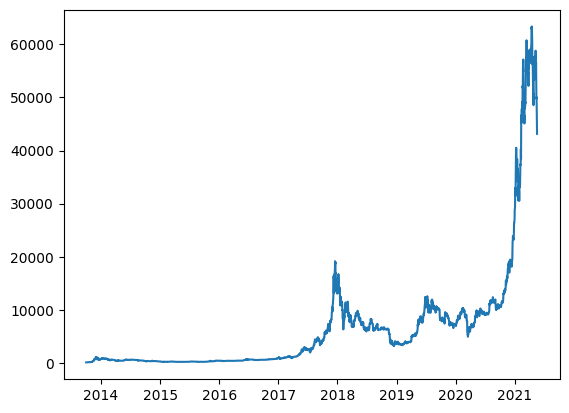

In [9]:
#plot
plt.figure()
plt.plot(timesteps, btc_price);

## Create train and test sets

### Create train & test datasets in wrong way

Random split

In [10]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [11]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test , y_train, y_test = train_test_split(timesteps,
                                                     prices,
                                                     test_size=0.2,
                                                     random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2229,), (2229,), (558,), (558,))

This split is wrong because it split the data randomly.

### Create train & test datasets in right way

Time series split

In [13]:
split_size = int(0.8 * len(prices))
x_train, y_train = timesteps[:split_size], prices[:split_size]
x_test, y_test = timesteps[split_size:], prices[split_size:]

In [14]:
split_size

2229

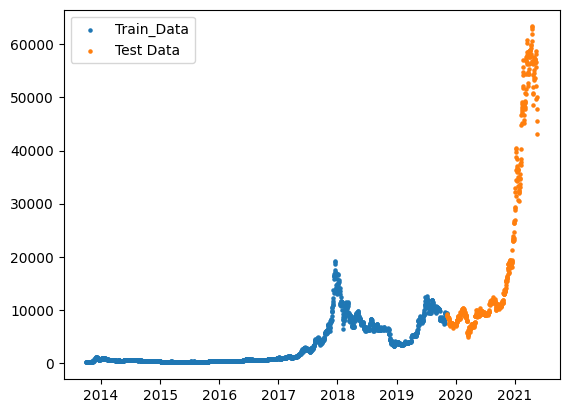

In [15]:
plt.figure()
plt.scatter(x_train, y_train, s=5, label='Train_Data')
plt.scatter(x_test, y_test, s=5, label='Test Data')
plt.legend();

## Create a plotting function

In [16]:
def plot_time_series(timesteps, values, format='.',start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel('Time')
  plt.ylabel('Price')
  plt.grid(True)
  if label:
    plt.legend();

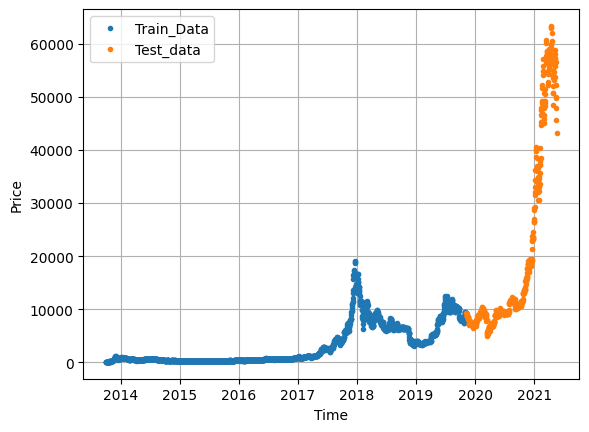

In [17]:
plot_time_series(x_train, y_train, label='Train_Data')
plot_time_series(x_test, y_test, label='Test_data')

## Model 0: Naive forcast

Blindly predict the next timestep as the previous timestep.

$$\hat{y}_{t} = y_{t-1}$$

In [18]:
naive_forcast = y_test[:-1]

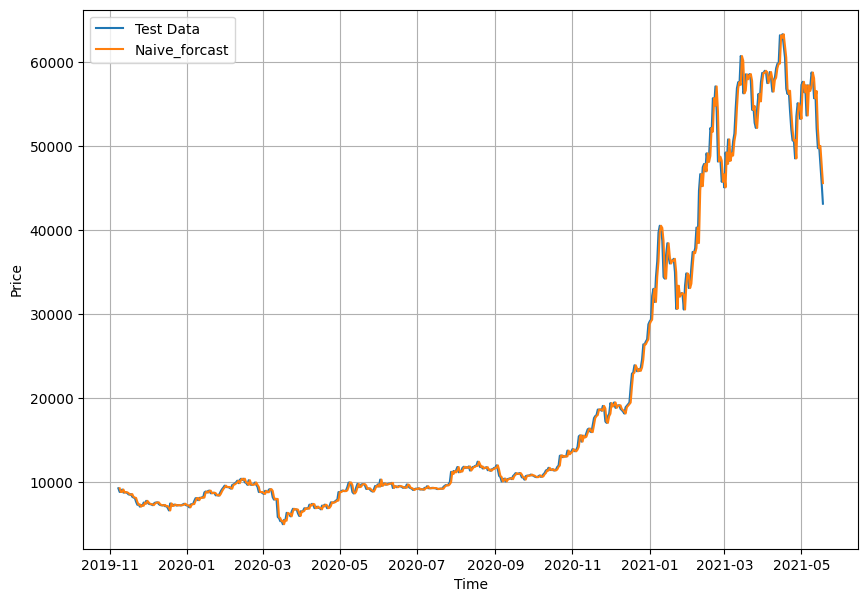

In [19]:
plt.figure(figsize=(10,7))
plot_time_series(x_test, y_test, format='-', label='Test Data')
plot_time_series(x_test[1:], naive_forcast, format='-', label='Naive_forcast')

### Evaluation Metrics

A few common regression metrics (which can also be used for time series forecasting):

* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean square error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error

For all of the above metrics, lower is better, for example, an MAE of 0 that is better than an MAE of 100.

In [20]:
import numpy as np
import tensorflow as tf
#MASE
def mean_absolute_scaled_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae / mae_naive_no_season

In [21]:
mean_absolute_scaled_error(y_true=y_test[1:],
                           y_pred=naive_forcast).numpy()

0.9995699939182624

In [22]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  ## Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [23]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forcast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Windowing our dataset

We are going to to make the time series problem a supervised problem throgh creating a function to use window size of 7 to pridice one value.

In [24]:
HORIZON = 1
WINDOW_SIZE = 7

In [25]:
def get_labelled_window(x, horizon):
  return x[:,:-horizon], x[:,-horizon:]

In [26]:
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8), axis=0), horizon=1)
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[7]], dtype=int32)>)

### The function that windowing the data

Our function will:

1. Create a window step of specific window size (e.g. [0, 1, 2, 3, 4, 5, 6])
2. Use NumPy indexing to create a 2D array of multiple window steps, for example:
```
[[0, 1, 2, 3, 4, 5, 6],
 [1, 2, 3, 4, 5, 6, 7],
 [2, 3, 4, 5, 6, 7, 8]]
```

3. Uses the 2D array of multiple window steps (from 2.) to index on a target series (e.g. the historical price of Bitcoin)
4. Uses our get_labelled_windows() function we created above to turn the window steps into windows with a specified horizon

In [27]:
# The main function will be used
import numpy as np

def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):

  window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)              # -1 FOR ZERO INDEXES

  window_indexs = window_step + np.expand_dims(np.arange(len(x) - (window_size+horizon-1)), axis=0 ).T     #create 2D array of windows in size of window size

  windowed_array = x[window_indexs]

  windows, label = get_labelled_window(windowed_array, horizon)


  return windows, label

In [28]:
full_windows, full_labels = make_windows(prices)
full_windows, full_labels

(array([[  123.65499   ,   125.455     ,   108.58483   , ...,
           121.33866   ,   120.65533   ,   121.795     ],
        [  125.455     ,   108.58483   ,   118.67466   , ...,
           120.65533   ,   121.795     ,   123.033     ],
        [  108.58483   ,   118.67466   ,   121.33866   , ...,
           121.795     ,   123.033     ,   124.049     ],
        ...,
        [58788.20967893, 58102.19142623, 55715.54665129, ...,
         52147.82118698, 49764.1320816 , 50032.69313676],
        [58102.19142623, 55715.54665129, 56573.5554719 , ...,
         49764.1320816 , 50032.69313676, 47885.62525472],
        [55715.54665129, 56573.5554719 , 52147.82118698, ...,
         50032.69313676, 47885.62525472, 45604.61575361]]),
 array([[  123.033     ],
        [  124.049     ],
        [  125.96116   ],
        ...,
        [47885.62525472],
        [45604.61575361],
        [43144.47129086]]))

In [29]:
len(full_windows), len(full_labels)

(2780, 2780)

### Create Train & Test Datasets

In [30]:
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [31]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

In [32]:
len(train_windows), len(train_labels)

(2224, 2224)

In [33]:
len(test_windows), len(test_labels)

(556, 556)

In [34]:
train_labels.shape

(2224, 1)

## Create ModelCheckpoint

In [35]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

In [36]:
import os
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor="val_loss",
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True)

## Model 1: Dense model (window_size=7, horizon=1)

In [37]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear')
], name='model_1_dense')

In [38]:
model_1.compile(loss='mae',
                optimizer = Adam(),
                metrics=['mae', 'mse'])

In [39]:
model_1_history = model_1.fit(train_windows,
                              train_labels,
                              epochs=100,
                              verbose=0,
                              batch_size=128,
                              validation_data=(test_windows, test_labels),
                              callbacks=[create_model_checkpoint(model_name=model_1.name)])

In [40]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 622.7540 - mae: 622.7540 - mse: 1286772.3750


[622.7540283203125, 622.7540283203125, 1286772.375]

In [41]:
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(train_windows, train_labels)

70/70 [==============================] - 0s 2ms/step - loss: 107.3986 - mae: 107.3986 - mse: 71245.4375


[107.39862060546875, 107.39862060546875, 71245.4375]

### Make forcast with a model (on the test data)

In [42]:
def make_pred(model, input_data):
  forcast = model.predict(input_data)
  return tf.squeeze(forcast)

In [43]:
model_1_pred = make_pred(model_1, test_windows)
model_1_pred[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8889.366, 8743.968, 8974.701, 8791.99 , 8685.883, 8711.311,
       8693.351, 8483.984, 8440.474, 8495.005], dtype=float32)>

In [44]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_pred)
model_1_results

{'mae': 585.1086,
 'mse': 1221030.0,
 'rmse': 1105.0022,
 'mape': 2.621584,
 'mase': 1.0278738}

In [45]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [46]:
model_1_pred.shape

TensorShape([556])

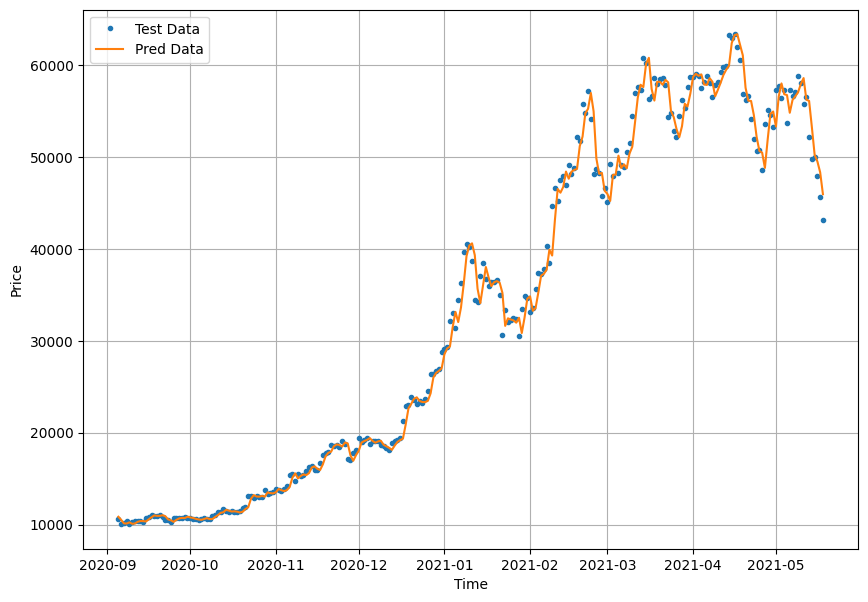

In [47]:
## plot the model prediction
offset = 300               # we cant plot our windows because of the dimintionalty
plt.figure(figsize=(10,7))
plot_time_series(x_test[-len(test_windows):], values=test_labels, start=offset, label='Test Data')
plot_time_series(x_test[-len(test_windows):], values=model_1_pred, start=offset, format='-', label='Pred Data')

## Model 2: Dense model (window_size=30, horizon=7)

In [48]:
prices.shape

(2787,)

In [49]:
# Preparing the data to the model
windows_30, labels_7 = make_windows(prices, window_size=30, horizon=7)
windows_30[0], labels_7[0]

(array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
        180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ]),
 array([196.02499, 198.04883, 198.93233, 200.543  , 210.3075 , 225.02   ,
        248.25333]))

In [50]:
len(windows_30), len(labels_7)

(2751, 2751)

In [51]:
# Split the data into train and test
train_windows_30, test_windows_30, train_labels_7, test_labels_7 = make_train_test_splits(windows_30, labels_7)
len(train_windows_30), len(train_labels_7), len(test_windows_30), len(test_labels_7)

(2200, 2200, 551, 551)

In [52]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(7, activation='linear')
], name='model_2_dense')

model_2.compile(loss='mae',
                optimizer=Adam())

In [53]:
model_2_history = model_2.fit(x=train_windows_30,
                              y=train_labels_7,
                              epochs=100,
                              batch_size=128,
                              verbose=0,
                              validation_data=(test_windows_30, test_labels_7),
                              callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [54]:
model_2.evaluate(test_windows_30, test_labels_7)

18/18 [==============================] - 0s 2ms/step - loss: 1307.4427


1307.4427490234375

In [55]:
model_2 = tf.keras.models.load_model('model_experiments/model_2_dense')
model_2.evaluate(test_windows_30, test_labels_7)

18/18 [==============================] - 0s 2ms/step - loss: 1234.4545


1234.4544677734375

In [56]:
model_2_pred = model_2.predict(test_windows_30)
model_2_pred[:5]

18/18 [==============================] - 0s 2ms/step


array([[9393.568 , 9414.46  , 9347.627 , 9475.592 , 9303.26  , 9418.716 ,
        9144.152 ],
       [9048.475 , 9185.928 , 9111.514 , 9445.407 , 9120.984 , 9163.601 ,
        9147.951 ],
       [8750.966 , 9180.161 , 8856.781 , 9328.963 , 9036.059 , 9151.128 ,
        9001.2705],
       [8901.631 , 9288.255 , 9026.075 , 9471.951 , 9346.695 , 9234.366 ,
        9205.922 ],
       [8612.716 , 8959.953 , 9021.861 , 9136.658 , 9189.943 , 8929.058 ,
        8996.589 ]], dtype=float32)

In [57]:
model_2_pred.ndim, test_labels_7.ndim

(2, 2)

In [58]:
model_2_results = evaluate_preds(test_labels_7,
                                 model_2_pred)
model_2_results

{'mae': array([  563.55286 ,   423.58133 ,   433.6801  ,   584.1048  ,
          466.0996  ,   464.67654 ,   511.1652  ,   562.8773  ,
          541.59924 ,   601.53156 ,   846.6763  ,   774.4008  ,
          862.7902  ,   899.9629  ,   643.7516  ,   332.73633 ,
          242.6114  ,   269.30078 ,   216.82178 ,   234.98221 ,
          174.7207  ,   217.16267 ,   429.0854  ,   378.5385  ,
          276.15033 ,   157.78844 ,    86.07806 ,    78.50739 ,
          140.11287 ,   192.839   ,   331.80484 ,   410.13336 ,
          447.9394  ,   376.6619  ,   338.13477 ,   336.83008 ,
          336.37967 ,   243.30797 ,   275.82553 ,   191.65883 ,
          491.2747  ,    90.90353 ,    59.87814 ,   103.44405 ,
          116.50921 ,   193.60435 ,   103.298965,    84.201035,
           79.4255  ,   128.22607 ,   111.32548 ,   191.98326 ,
          190.35938 ,   238.72176 ,   247.72307 ,   347.1229  ,
          512.376   ,   475.45807 ,   489.37848 ,   557.8559  ,
          310.94537 ,   211.32645

In [59]:
model_1_results['mae'].ndim

0

In [60]:
model_2_results['mse'].ndim

1

In [61]:
def evaluate_preds(y_true, y_pred):
  ## Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [62]:
model_2_results = evaluate_preds(test_labels_7,
                                model_2_pred)
model_2_results

{'mae': 1234.4546,
 'mse': 5326514.0,
 'rmse': 1426.7496,
 'mape': 5.5723658,
 'mase': 2.1966426}

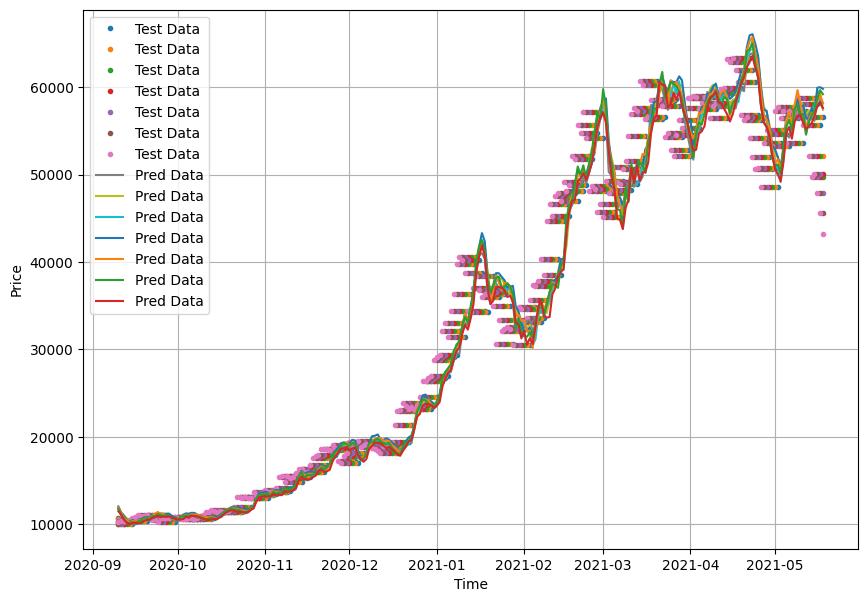

In [63]:
plt.figure(figsize=(10,7))
plot_time_series(x_test[-len(test_windows_30):], values=test_labels_7, start=offset, label='Test Data')
plot_time_series(x_test[-len(test_windows_30):], values=model_2_pred,format='-', start=offset, label='Pred Data')

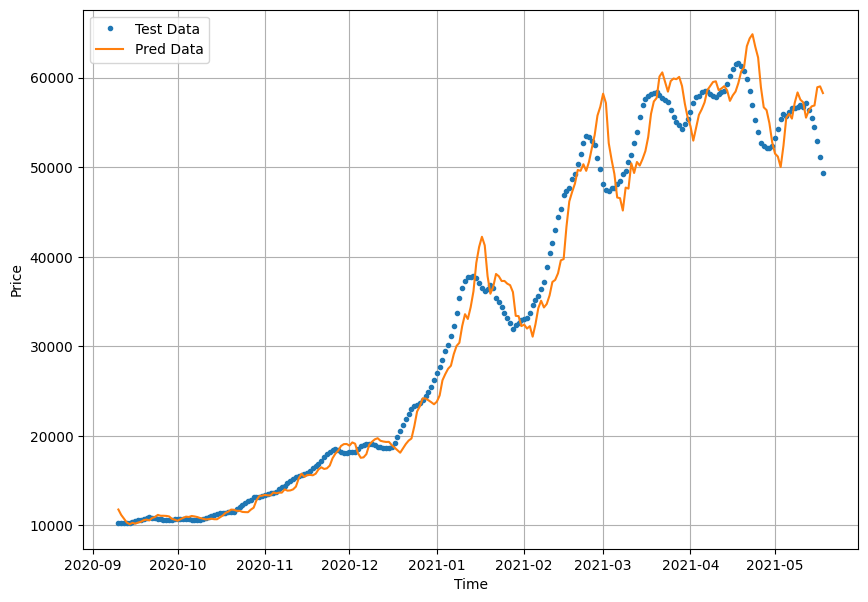

In [64]:
# reduce the dimintionalty of the data
plt.figure(figsize=(10,7))
plot_time_series(x_test[-len(test_windows_30):], values=tf.reduce_mean(test_labels_7, axis=1), start=offset, label='Test Data')
plot_time_series(x_test[-len(test_windows_30):], values=tf.reduce_mean(model_2_pred, axis=1),format='-', start=offset, label='Pred Data')

<Axes: >

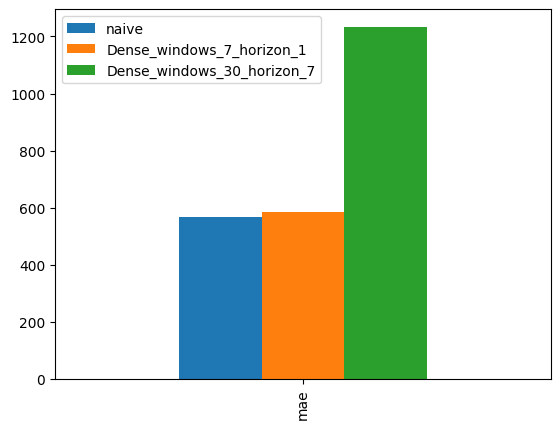

In [65]:
#Plot the results of the models so far
pd.DataFrame({'naive':naive_results['mae'],
              'Dense_windows_7_horizon_1': model_1_results['mae'],
              'Dense_windows_30_horizon_7':model_2_results['mae']}, index=['mae']).plot(kind='bar')

## Model 3: Dense model (window=30, horizon=1)

### Model 4: Conv1D

Conv1D is temporal(زمني) conveluation

In [66]:
# We are going to use the same data been used in model_1
full_windows.shape, full_labels.shape

((2780, 7), (2780, 1))

In [67]:
train_windows.shape, train_labels.shape, test_windows.shape, test_labels.shape

((2224, 7), (2224, 1), (556, 7), (556, 1))

In [68]:
train_windows[0].ndim

1

The conv1D layer need data in daimintion of 3 --> `(batch_size, timesteps, input_dim)`

In [69]:
full_windows[0].ndim

1

In [70]:
tf.expand_dims(full_windows[0], axis=1)

<tf.Tensor: shape=(7, 1), dtype=float64, numpy=
array([[123.65499],
       [125.455  ],
       [108.58483],
       [118.67466],
       [121.33866],
       [120.65533],
       [121.795  ]])>

In [71]:
# Create Conv1D layer
tf.random.set_seed(42)
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),   #going to expand the shape
    layers.Conv1D(128, 7, padding='causal', activation='relu'),
    layers.Dense(1)
], name='model_4_cnn')

model_4.compile(loss='mae',
                optimizer=Adam())

In [72]:
model_4_history = model_4.fit(full_windows,
                              full_labels,
                              batch_size=128,
                              epochs=100,
                              validation_data=(test_windows, test_labels),
                              callbacks=[create_model_checkpoint(model_name=model_4.name)])

Epoch 1/100
22/22 [==============================] - ETA: 0s - loss: 4190.3784

22/22 [==============================] - 6s 45ms/step - loss: 4190.3784 - val_loss: 2420.9368
Epoch 2/100
18/22 [=======================>......] - ETA: 0s - loss: 608.2325

22/22 [==============================] - 1s 33ms/step - loss: 580.0593 - val_loss: 1520.6088
Epoch 3/100
18/22 [=======================>......] - ETA: 0s - loss: 415.4784

22/22 [==============================] - 1s 33ms/step - loss: 404.8513 - val_loss: 1082.9172
Epoch 4/100
18/22 [=======================>......] - ETA: 0s - loss: 368.6299

22/22 [==============================] - 1s 32ms/step - loss: 363.6255 - val_loss: 1050.3041
Epoch 5/100
16/22 [====================>.........] - ETA: 0s - loss: 359.1697

22/22 [==============================] - 1s 32ms/step - loss: 357.7043 - val_loss: 1037.8197
Epoch 6/100
18/22 [=======================>......] - ETA: 0s - loss: 351.1900

22/22 [==============================] - 1s 33ms/step - loss: 352.0707 - val_loss: 1016.1077
Epoch 7/100
18/22 [=======================>......] - ETA: 0s - loss: 341.3813

22/22 [==============================] - 1s 33ms/step - loss: 346.0586 - val_loss: 1001.5662
Epoch 8/100
17/22 [======================>.......] - ETA: 0s - loss: 339.7678

22/22 [==============================] - 1s 46ms/step - loss: 345.6688 - val_loss: 997.7064
Epoch 9/100
22/22 [==============================] - 0s 7ms/step - loss: 342.6155 - val_loss: 1043.2415
Epoch 10/100
22/22 [==============================] - ETA: 0s - loss: 339.2838

22/22 [==============================] - 1s 48ms/step - loss: 339.2838 - val_loss: 987.9578
Epoch 11/100
13/22 [================>.............] - ETA: 0s - loss: 324.7478

22/22 [==============================] - 1s 36ms/step - loss: 332.2809 - val_loss: 947.6616
Epoch 12/100
18/22 [=======================>......] - ETA: 0s - loss: 319.5125

22/22 [==============================] - 1s 47ms/step - loss: 326.6514 - val_loss: 932.9409
Epoch 13/100
22/22 [==============================] - 0s 5ms/step - loss: 321.8331 - val_loss: 982.5417
Epoch 14/100
17/22 [======================>.......] - ETA: 0s - loss: 317.0708

22/22 [==============================] - 1s 34ms/step - loss: 318.4612 - val_loss: 908.1888
Epoch 15/100
22/22 [==============================] - 0s 6ms/step - loss: 308.7286 - val_loss: 910.6157
Epoch 16/100
18/22 [=======================>......] - ETA: 0s - loss: 304.2776

22/22 [==============================] - 1s 33ms/step - loss: 304.9178 - val_loss: 871.4375
Epoch 17/100
22/22 [==============================] - 0s 5ms/step - loss: 298.6444 - val_loss: 889.9967
Epoch 18/100
22/22 [==============================] - 0s 5ms/step - loss: 297.4121 - val_loss: 901.5449
Epoch 19/100
18/22 [=======================>......] - ETA: 0s - loss: 282.6624

22/22 [==============================] - 1s 32ms/step - loss: 293.7525 - val_loss: 831.5607
Epoch 20/100
16/22 [====================>.........] - ETA: 0s - loss: 298.7510

22/22 [==============================] - 1s 33ms/step - loss: 292.6634 - val_loss: 821.6902
Epoch 21/100
22/22 [==============================] - 0s 5ms/step - loss: 282.4355 - val_loss: 838.5968
Epoch 22/100
19/22 [========================>.....] - ETA: 0s - loss: 285.9185

22/22 [==============================] - 1s 33ms/step - loss: 281.1636 - val_loss: 799.4023
Epoch 23/100
15/22 [===================>..........] - ETA: 0s - loss: 275.5426

22/22 [==============================] - 1s 32ms/step - loss: 279.2348 - val_loss: 783.1155
Epoch 24/100
22/22 [==============================] - 0s 5ms/step - loss: 279.2993 - val_loss: 879.7562
Epoch 25/100
18/22 [=======================>......] - ETA: 0s - loss: 286.1515

22/22 [==============================] - 1s 32ms/step - loss: 278.3415 - val_loss: 755.9069
Epoch 26/100
16/22 [====================>.........] - ETA: 0s - loss: 264.5799

22/22 [==============================] - 1s 33ms/step - loss: 259.8344 - val_loss: 745.1580
Epoch 27/100
22/22 [==============================] - 0s 5ms/step - loss: 256.0194 - val_loss: 799.9166
Epoch 28/100
18/22 [=======================>......] - ETA: 0s - loss: 248.2433

22/22 [==============================] - 1s 33ms/step - loss: 255.2689 - val_loss: 732.3185
Epoch 29/100
22/22 [==============================] - 0s 5ms/step - loss: 253.5245 - val_loss: 772.4908
Epoch 30/100
19/22 [========================>.....] - ETA: 0s - loss: 248.1178

22/22 [==============================] - 1s 34ms/step - loss: 250.7923 - val_loss: 708.1513
Epoch 31/100
22/22 [==============================] - 0s 5ms/step - loss: 258.8940 - val_loss: 721.0183
Epoch 32/100
22/22 [==============================] - 0s 5ms/step - loss: 243.0038 - val_loss: 739.0595
Epoch 33/100
17/22 [======================>.......] - ETA: 0s - loss: 238.2687

22/22 [==============================] - 1s 62ms/step - loss: 243.8070 - val_loss: 684.4669
Epoch 34/100
22/22 [==============================] - 0s 7ms/step - loss: 246.5013 - val_loss: 691.7274
Epoch 35/100
22/22 [==============================] - 0s 7ms/step - loss: 251.4585 - val_loss: 693.7484
Epoch 36/100
22/22 [==============================] - 0s 7ms/step - loss: 247.9660 - val_loss: 698.1485
Epoch 37/100
12/22 [===============>..............] - ETA: 0s - loss: 230.9418

22/22 [==============================] - 1s 43ms/step - loss: 238.9666 - val_loss: 659.6473
Epoch 38/100
22/22 [==============================] - 0s 5ms/step - loss: 233.8029 - val_loss: 661.0743
Epoch 39/100
18/22 [=======================>......] - ETA: 0s - loss: 232.9958

22/22 [==============================] - 1s 34ms/step - loss: 228.0810 - val_loss: 657.8425
Epoch 40/100
22/22 [==============================] - 0s 5ms/step - loss: 242.6764 - val_loss: 671.0330
Epoch 41/100
18/22 [=======================>......] - ETA: 0s - loss: 241.8424

22/22 [==============================] - 1s 34ms/step - loss: 235.8238 - val_loss: 648.7308
Epoch 42/100
17/22 [======================>.......] - ETA: 0s - loss: 232.8708

22/22 [==============================] - 1s 34ms/step - loss: 229.5512 - val_loss: 638.8186
Epoch 43/100
22/22 [==============================] - 0s 5ms/step - loss: 225.7686 - val_loss: 764.3299
Epoch 44/100
22/22 [==============================] - 0s 4ms/step - loss: 245.2538 - val_loss: 707.2682
Epoch 45/100
22/22 [==============================] - 0s 5ms/step - loss: 231.4569 - val_loss: 646.8267
Epoch 46/100
22/22 [==============================] - 0s 4ms/step - loss: 225.4508 - val_loss: 656.9852
Epoch 47/100
13/22 [================>.............] - ETA: 0s - loss: 222.2552

22/22 [==============================] - 1s 33ms/step - loss: 225.8925 - val_loss: 624.5956
Epoch 48/100
22/22 [==============================] - 0s 5ms/step - loss: 220.0785 - val_loss: 751.4075
Epoch 49/100
22/22 [==============================] - 0s 4ms/step - loss: 228.4340 - val_loss: 640.8948
Epoch 50/100
15/22 [===================>..........] - ETA: 0s - loss: 224.0469

22/22 [==============================] - 1s 33ms/step - loss: 218.6232 - val_loss: 620.3281
Epoch 51/100
22/22 [==============================] - 0s 5ms/step - loss: 219.7986 - val_loss: 752.5425
Epoch 52/100
22/22 [==============================] - 0s 5ms/step - loss: 235.2202 - val_loss: 626.3057
Epoch 53/100
22/22 [==============================] - 0s 5ms/step - loss: 218.0798 - val_loss: 648.6644
Epoch 54/100
17/22 [======================>.......] - ETA: 0s - loss: 224.4943

22/22 [==============================] - 1s 33ms/step - loss: 217.1876 - val_loss: 611.0536
Epoch 55/100
19/22 [========================>.....] - ETA: 0s - loss: 215.3182

22/22 [==============================] - 1s 34ms/step - loss: 214.4396 - val_loss: 609.1655
Epoch 56/100
22/22 [==============================] - 0s 5ms/step - loss: 224.4275 - val_loss: 675.1714
Epoch 57/100
22/22 [==============================] - 0s 4ms/step - loss: 220.4875 - val_loss: 694.8180
Epoch 58/100
16/22 [====================>.........] - ETA: 0s - loss: 223.6050

22/22 [==============================] - 1s 33ms/step - loss: 220.2804 - val_loss: 604.8586
Epoch 59/100
22/22 [==============================] - 0s 5ms/step - loss: 213.7455 - val_loss: 650.2727
Epoch 60/100
22/22 [==============================] - 0s 5ms/step - loss: 213.4197 - val_loss: 618.7889
Epoch 61/100
22/22 [==============================] - 0s 5ms/step - loss: 212.0961 - val_loss: 614.8459
Epoch 62/100
22/22 [==============================] - 0s 5ms/step - loss: 215.9599 - val_loss: 627.0432
Epoch 63/100
16/22 [====================>.........] - ETA: 0s - loss: 211.0365

22/22 [==============================] - 1s 33ms/step - loss: 219.0164 - val_loss: 598.4236
Epoch 64/100
22/22 [==============================] - 0s 5ms/step - loss: 212.7778 - val_loss: 620.4631
Epoch 65/100
22/22 [==============================] - 0s 5ms/step - loss: 215.2485 - val_loss: 615.1953
Epoch 66/100
22/22 [==============================] - 0s 5ms/step - loss: 217.5867 - val_loss: 610.2242
Epoch 67/100
22/22 [==============================] - 0s 5ms/step - loss: 214.1198 - val_loss: 643.4932
Epoch 68/100
19/22 [========================>.....] - ETA: 0s - loss: 221.9685

22/22 [==============================] - 1s 47ms/step - loss: 229.8516 - val_loss: 593.2598
Epoch 69/100
12/22 [===============>..............] - ETA: 0s - loss: 189.8096

22/22 [==============================] - 1s 47ms/step - loss: 211.6382 - val_loss: 593.0227
Epoch 70/100
13/22 [================>.............] - ETA: 0s - loss: 211.3350

22/22 [==============================] - 1s 46ms/step - loss: 210.4069 - val_loss: 592.5168
Epoch 71/100
22/22 [==============================] - 0s 8ms/step - loss: 210.2809 - val_loss: 594.6108
Epoch 72/100
22/22 [==============================] - 0s 7ms/step - loss: 215.7526 - val_loss: 650.2096
Epoch 73/100
22/22 [==============================] - 0s 5ms/step - loss: 214.7625 - val_loss: 633.1114
Epoch 74/100
22/22 [==============================] - 0s 5ms/step - loss: 212.5125 - val_loss: 601.0634
Epoch 75/100
22/22 [==============================] - 0s 5ms/step - loss: 210.0432 - val_loss: 640.6545
Epoch 76/100
22/22 [==============================] - 0s 5ms/step - loss: 219.0702 - val_loss: 606.2932
Epoch 77/100
22/22 [==============================] - 0s 5ms/step - loss: 215.7988 - val_loss: 767.9111
Epoch 78/100
18/22 [=======================>......] - ETA: 0s - loss: 213.7833

22/22 [==============================] - 1s 33ms/step - loss: 218.8672 - val_loss: 585.0018
Epoch 79/100
22/22 [==============================] - 0s 5ms/step - loss: 212.0420 - val_loss: 633.3864
Epoch 80/100
22/22 [==============================] - 0s 5ms/step - loss: 209.4711 - val_loss: 585.8572
Epoch 81/100
22/22 [==============================] - 0s 5ms/step - loss: 210.1797 - val_loss: 598.6986
Epoch 82/100
22/22 [==============================] - 0s 5ms/step - loss: 207.9161 - val_loss: 595.4572
Epoch 83/100
22/22 [==============================] - 0s 5ms/step - loss: 205.7144 - val_loss: 605.8985
Epoch 84/100
22/22 [==============================] - 0s 5ms/step - loss: 213.9478 - val_loss: 594.0860
Epoch 85/100
22/22 [==============================] - 0s 4ms/step - loss: 207.0783 - val_loss: 605.8327
Epoch 86/100
19/22 [========================>.....] - ETA: 0s - loss: 203.0243

22/22 [==============================] - 1s 32ms/step - loss: 205.5292 - val_loss: 579.5515
Epoch 87/100
22/22 [==============================] - 0s 6ms/step - loss: 220.7374 - val_loss: 592.0281
Epoch 88/100
22/22 [==============================] - 0s 5ms/step - loss: 233.0810 - val_loss: 582.5263
Epoch 89/100
22/22 [==============================] - 0s 5ms/step - loss: 225.9751 - val_loss: 682.6495
Epoch 90/100
22/22 [==============================] - 0s 5ms/step - loss: 213.3125 - val_loss: 633.8721
Epoch 91/100
22/22 [==============================] - 0s 5ms/step - loss: 211.5175 - val_loss: 623.3221
Epoch 92/100
22/22 [==============================] - 0s 5ms/step - loss: 208.2946 - val_loss: 594.9749
Epoch 93/100
19/22 [========================>.....] - ETA: 0s - loss: 198.9490

22/22 [==============================] - 1s 33ms/step - loss: 204.4542 - val_loss: 577.6756
Epoch 94/100
18/22 [=======================>......] - ETA: 0s - loss: 200.6190

22/22 [==============================] - 1s 33ms/step - loss: 204.9727 - val_loss: 575.0250
Epoch 95/100
22/22 [==============================] - 0s 5ms/step - loss: 210.5146 - val_loss: 607.8998
Epoch 96/100
22/22 [==============================] - 0s 5ms/step - loss: 206.8420 - val_loss: 577.5640
Epoch 97/100
22/22 [==============================] - 0s 5ms/step - loss: 204.1337 - val_loss: 578.8541
Epoch 98/100
22/22 [==============================] - 0s 5ms/step - loss: 204.9423 - val_loss: 579.6290
Epoch 99/100
22/22 [==============================] - 0s 5ms/step - loss: 204.2970 - val_loss: 598.5822
Epoch 100/100
22/22 [==============================] - 0s 4ms/step - loss: 212.9281 - val_loss: 643.3601


In [73]:
model_4.summary()

Model: "model_4_cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            6400      
                                                                 
 dense_4 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 6,529
Trainable params: 6,529
Non-trainable params: 0
_________________________________________________________________


In [74]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 643.3601


643.360107421875

In [75]:
model_4 = tf.keras.models.load_model('/content/model_experiments/model_4_cnn')
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 575.0251


575.0250854492188

In [76]:
model_4_pred = model_4.predict(test_windows)
model_4_pred.shape

18/18 [==============================] - 0s 2ms/step


(556, 1, 1)

In [77]:
test_labels.shape

(556, 1)

In [78]:
model_4_results = evaluate_preds(test_labels,
                                  model_4_pred)
model_4_results

{'mae': 17152.88,
 'mse': 615354430.0,
 'rmse': 17152.88,
 'mape': 113.411285,
 'mase': 30.13286}

## Model 5: LSTM

In [79]:
model_5 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.LSTM(128, activation='relu', return_sequences=True),
    layers.LSTM(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
], name='model_5_lstm')

model_5.compile(loss='mae',
                optimizer=Adam())

In [80]:
model_5.fit(full_windows,
            full_labels,
            128,
            100,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
21/22 [===========================>..] - ETA: 0s - loss: 5643.6523

22/22 [==============================] - 8s 180ms/step - loss: 5562.5293 - val_loss: 10514.0771
Epoch 2/100
22/22 [==============================] - ETA: 0s - loss: 1313.2118

22/22 [==============================] - 4s 178ms/step - loss: 1313.2118 - val_loss: 2228.8452
Epoch 3/100
19/22 [========================>.....] - ETA: 0s - loss: 450.0555

22/22 [==============================] - 4s 179ms/step - loss: 433.4702 - val_loss: 892.5238
Epoch 4/100
22/22 [==============================] - 0s 11ms/step - loss: 313.6832 - val_loss: 895.5155
Epoch 5/100
19/22 [========================>.....] - ETA: 0s - loss: 300.4010

22/22 [==============================] - 3s 149ms/step - loss: 302.3268 - val_loss: 852.9762
Epoch 6/100
22/22 [==============================] - 0s 11ms/step - loss: 301.7695 - val_loss: 866.0833
Epoch 7/100
20/22 [==========================>...] - ETA: 0s - loss: 296.0418

22/22 [==============================] - 3s 156ms/step - loss: 292.6919 - val_loss: 839.3608
Epoch 8/100
21/22 [===========================>..] - ETA: 0s - loss: 287.1490

22/22 [==============================] - 4s 198ms/step - loss: 287.1987 - val_loss: 800.5707
Epoch 9/100
22/22 [==============================] - 0s 11ms/step - loss: 283.0823 - val_loss: 900.1005
Epoch 10/100
18/22 [=======================>......] - ETA: 0s - loss: 299.9064

22/22 [==============================] - 3s 149ms/step - loss: 295.4702 - val_loss: 763.4370
Epoch 11/100
22/22 [==============================] - 0s 11ms/step - loss: 275.2560 - val_loss: 799.7393
Epoch 12/100
21/22 [===========================>..] - ETA: 0s - loss: 272.0512

22/22 [==============================] - 4s 171ms/step - loss: 272.2039 - val_loss: 737.0923
Epoch 13/100
22/22 [==============================] - 0s 11ms/step - loss: 253.9686 - val_loss: 832.7386
Epoch 14/100
22/22 [==============================] - 0s 10ms/step - loss: 268.2264 - val_loss: 936.9501
Epoch 15/100
22/22 [==============================] - 0s 19ms/step - loss: 270.6246 - val_loss: 805.8286
Epoch 16/100
21/22 [===========================>..] - ETA: 0s - loss: 249.2093

22/22 [==============================] - 4s 178ms/step - loss: 248.2634 - val_loss: 675.1391
Epoch 17/100
22/22 [==============================] - 0s 10ms/step - loss: 236.7268 - val_loss: 864.8981
Epoch 18/100
22/22 [==============================] - 0s 11ms/step - loss: 244.1174 - val_loss: 726.1587
Epoch 19/100
22/22 [==============================] - 0s 11ms/step - loss: 228.1639 - val_loss: 701.4161
Epoch 20/100
20/22 [==========================>...] - ETA: 0s - loss: 230.8430

22/22 [==============================] - 3s 151ms/step - loss: 224.7307 - val_loss: 621.7082
Epoch 21/100
20/22 [==========================>...] - ETA: 0s - loss: 220.5266

22/22 [==============================] - 4s 172ms/step - loss: 218.4920 - val_loss: 616.3536
Epoch 22/100
21/22 [===========================>..] - ETA: 0s - loss: 255.5863

22/22 [==============================] - 4s 182ms/step - loss: 252.7053 - val_loss: 608.0472
Epoch 23/100
22/22 [==============================] - 0s 10ms/step - loss: 228.1966 - val_loss: 656.5994
Epoch 24/100
22/22 [==============================] - 0s 10ms/step - loss: 217.8302 - val_loss: 623.8984
Epoch 25/100
22/22 [==============================] - 0s 11ms/step - loss: 217.4502 - val_loss: 671.0399
Epoch 26/100
18/22 [=======================>......] - ETA: 0s - loss: 215.7751

22/22 [==============================] - 4s 173ms/step - loss: 213.4036 - val_loss: 597.8370
Epoch 27/100
22/22 [==============================] - ETA: 0s - loss: 211.5335

22/22 [==============================] - 3s 148ms/step - loss: 211.5335 - val_loss: 597.1903
Epoch 28/100
22/22 [==============================] - 0s 11ms/step - loss: 216.6545 - val_loss: 631.0380
Epoch 29/100
22/22 [==============================] - 0s 12ms/step - loss: 216.7083 - val_loss: 618.4825
Epoch 30/100
22/22 [==============================] - 0s 11ms/step - loss: 218.2239 - val_loss: 724.4334
Epoch 31/100
22/22 [==============================] - 0s 10ms/step - loss: 233.6402 - val_loss: 761.8277
Epoch 32/100
22/22 [==============================] - 0s 11ms/step - loss: 218.6024 - val_loss: 670.9601
Epoch 33/100
20/22 [==========================>...] - ETA: 0s - loss: 214.9119

22/22 [==============================] - 4s 183ms/step - loss: 217.4919 - val_loss: 592.8045
Epoch 34/100
22/22 [==============================] - 0s 11ms/step - loss: 226.5252 - val_loss: 635.5415
Epoch 35/100
22/22 [==============================] - 0s 11ms/step - loss: 226.5939 - val_loss: 596.9351
Epoch 36/100
22/22 [==============================] - 0s 11ms/step - loss: 204.8558 - val_loss: 628.3583
Epoch 37/100
18/22 [=======================>......] - ETA: 0s - loss: 206.2104

22/22 [==============================] - 4s 172ms/step - loss: 208.7503 - val_loss: 580.7004
Epoch 38/100
19/22 [========================>.....] - ETA: 0s - loss: 209.9464

22/22 [==============================] - 3s 151ms/step - loss: 208.9246 - val_loss: 580.2106
Epoch 39/100
22/22 [==============================] - 0s 11ms/step - loss: 214.2854 - val_loss: 588.4454
Epoch 40/100
22/22 [==============================] - 0s 11ms/step - loss: 219.1122 - val_loss: 592.1526
Epoch 41/100
22/22 [==============================] - 0s 11ms/step - loss: 243.9805 - val_loss: 754.1268
Epoch 42/100
22/22 [==============================] - 0s 14ms/step - loss: 226.7960 - val_loss: 663.9501
Epoch 43/100
22/22 [==============================] - 0s 20ms/step - loss: 208.6018 - val_loss: 593.2883
Epoch 44/100
22/22 [==============================] - 0s 20ms/step - loss: 209.5179 - val_loss: 774.5393
Epoch 45/100
22/22 [==============================] - 0s 19ms/step - loss: 210.9899 - val_loss: 604.8771
Epoch 46/100
22/22 [==============================] - 0s 19ms/step - loss: 209.3266 - val_loss: 645.4336
Epoch 47/100
22/22 [==============================] - 0s 19ms/step 

22/22 [==============================] - 4s 171ms/step - loss: 212.6504 - val_loss: 576.0144
Epoch 50/100
22/22 [==============================] - 0s 10ms/step - loss: 222.3630 - val_loss: 776.2781
Epoch 51/100
22/22 [==============================] - 0s 11ms/step - loss: 222.7723 - val_loss: 605.2348
Epoch 52/100
22/22 [==============================] - 0s 12ms/step - loss: 209.0891 - val_loss: 622.4532
Epoch 53/100
22/22 [==============================] - 0s 13ms/step - loss: 208.7905 - val_loss: 598.3074
Epoch 54/100
22/22 [==============================] - 0s 11ms/step - loss: 213.0614 - val_loss: 752.5103
Epoch 55/100
22/22 [==============================] - 0s 12ms/step - loss: 211.5996 - val_loss: 582.0994
Epoch 56/100
22/22 [==============================] - 0s 11ms/step - loss: 212.2840 - val_loss: 667.9567
Epoch 57/100
22/22 [==============================] - 0s 11ms/step - loss: 207.5191 - val_loss: 626.2538
Epoch 58/100
22/22 [==============================] - 0s 11ms/step 

22/22 [==============================] - 4s 168ms/step - loss: 223.8597 - val_loss: 573.6531
Epoch 65/100
20/22 [==========================>...] - ETA: 0s - loss: 210.5065

22/22 [==============================] - 4s 171ms/step - loss: 213.5440 - val_loss: 572.5751
Epoch 66/100
22/22 [==============================] - 0s 11ms/step - loss: 206.2304 - val_loss: 616.7345
Epoch 67/100
22/22 [==============================] - 0s 11ms/step - loss: 205.5440 - val_loss: 598.1163
Epoch 68/100
22/22 [==============================] - 0s 11ms/step - loss: 220.2313 - val_loss: 670.5401
Epoch 69/100
22/22 [==============================] - 0s 12ms/step - loss: 223.1534 - val_loss: 581.6174
Epoch 70/100
19/22 [========================>.....] - ETA: 0s - loss: 229.0452

22/22 [==============================] - 4s 174ms/step - loss: 228.1739 - val_loss: 571.7308
Epoch 71/100
22/22 [==============================] - 0s 11ms/step - loss: 206.1064 - val_loss: 1144.5021
Epoch 72/100
22/22 [==============================] - 0s 10ms/step - loss: 273.2863 - val_loss: 805.7094
Epoch 73/100
22/22 [==============================] - 0s 12ms/step - loss: 227.4319 - val_loss: 752.8147
Epoch 74/100
22/22 [==============================] - 0s 11ms/step - loss: 212.2753 - val_loss: 575.5067
Epoch 75/100
22/22 [==============================] - 0s 11ms/step - loss: 205.7695 - val_loss: 605.2229
Epoch 76/100
21/22 [===========================>..] - ETA: 0s - loss: 216.7436

22/22 [==============================] - 4s 179ms/step - loss: 218.4518 - val_loss: 570.8638
Epoch 77/100
22/22 [==============================] - 0s 19ms/step - loss: 212.3883 - val_loss: 574.5126
Epoch 78/100
22/22 [==============================] - 0s 11ms/step - loss: 205.4350 - val_loss: 603.6553
Epoch 79/100
22/22 [==============================] - 0s 11ms/step - loss: 215.0192 - val_loss: 704.5689
Epoch 80/100
22/22 [==============================] - 0s 11ms/step - loss: 245.8062 - val_loss: 578.1238
Epoch 81/100
22/22 [==============================] - 0s 11ms/step - loss: 203.4472 - val_loss: 594.6821
Epoch 82/100
22/22 [==============================] - 0s 13ms/step - loss: 203.9835 - val_loss: 588.5685
Epoch 83/100
22/22 [==============================] - 0s 11ms/step - loss: 201.8658 - val_loss: 637.4286
Epoch 84/100
20/22 [==========================>...] - ETA: 0s - loss: 225.5289

22/22 [==============================] - 4s 170ms/step - loss: 228.7055 - val_loss: 568.0782
Epoch 85/100
22/22 [==============================] - 0s 10ms/step - loss: 205.0880 - val_loss: 569.4730
Epoch 86/100
22/22 [==============================] - 0s 11ms/step - loss: 202.8367 - val_loss: 631.7041
Epoch 87/100
21/22 [===========================>..] - ETA: 0s - loss: 211.9731

22/22 [==============================] - 3s 147ms/step - loss: 212.0411 - val_loss: 567.6910
Epoch 88/100
22/22 [==============================] - 0s 11ms/step - loss: 205.1415 - val_loss: 610.2333
Epoch 89/100
22/22 [==============================] - 0s 12ms/step - loss: 204.5072 - val_loss: 569.8986
Epoch 90/100
18/22 [=======================>......] - ETA: 0s - loss: 203.6251

22/22 [==============================] - 4s 184ms/step - loss: 205.6081 - val_loss: 566.8331
Epoch 91/100
22/22 [==============================] - 0s 10ms/step - loss: 208.0719 - val_loss: 668.2198
Epoch 92/100
22/22 [==============================] - 0s 10ms/step - loss: 222.0636 - val_loss: 802.9663
Epoch 93/100
22/22 [==============================] - 0s 11ms/step - loss: 217.0059 - val_loss: 609.0678
Epoch 94/100
22/22 [==============================] - 0s 11ms/step - loss: 213.5317 - val_loss: 589.7957
Epoch 95/100
22/22 [==============================] - 0s 11ms/step - loss: 226.2219 - val_loss: 570.6573
Epoch 96/100
22/22 [==============================] - 0s 11ms/step - loss: 207.2749 - val_loss: 608.4947
Epoch 97/100
22/22 [==============================] - 0s 12ms/step - loss: 220.5992 - val_loss: 746.1787
Epoch 98/100
22/22 [==============================] - 0s 11ms/step - loss: 224.5550 - val_loss: 657.4074
Epoch 99/100
22/22 [==============================] - 0s 11ms/step 

In [81]:
model_5.summary()

Model: "model_5_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 lstm (LSTM)                 (None, 1, 128)            69632     
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 209,537
Trainable params: 209,537
Non-trainable params: 0
_________________________________________________________________


In [82]:
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 584.3733


584.373291015625

In [83]:
model_5 = tf.keras.models.load_model('/content/model_experiments/model_5_lstm')
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 566.8331


566.8330688476562

In [84]:
model_5_pred = model_5.predict(test_windows)
model_5_results = evaluate_preds(test_labels,
                                 model_5_pred)
model_5_results

18/18 [==============================] - 0s 3ms/step


{'mae': 566.83307,
 'mse': 1164816.6,
 'rmse': 566.83307,
 'mape': 2.5435836,
 'mase': 0.9957687}

In [85]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Make Multivariate Time Series

In [86]:
# Let's add the bitcoin halving events to our dataset
block_reward_1 = 50 # 3 January 2009 - this block reward isn't in our dataset (our data starts from 01 October 2013)
block_reward_2 = 25 # 8 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

block_reward_2_datetime = np.datetime64('2012-11-28')
block_reward_3_datetime = np.datetime64('2016-07-09')
block_reward_4_datetime = np.datetime64('2020-05-18')

In [87]:
# Create date ranges of where specific block_reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [88]:
# Add block reward to the dataframe
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block['block_reward'] = None
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,None
2013-10-02,125.45500,None
2013-10-03,108.58483,None
2013-10-04,118.67466,None
2013-10-05,121.33866,None


In [89]:
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2

In [90]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [91]:
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3

In [92]:
bitcoin_prices_block[1010:1015]

,Price,block_reward
Date,,
2016-07-07,671.81400,25
2016-07-08,640.47600,25
2016-07-09,654.85299,12.5
2016-07-10,649.35600,12.5
2016-07-11,656.74700,12.5


In [93]:
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [94]:
bitcoin_prices_block[2420:2425]

,Price,block_reward
Date,,
2020-05-17,9418.918551,12.5
2020-05-18,9684.701959,6.25
2020-05-19,9723.680150,6.25
2020-05-20,9719.480854,6.25
2020-05-21,9540.886567,6.25


<Axes: xlabel='Date'>

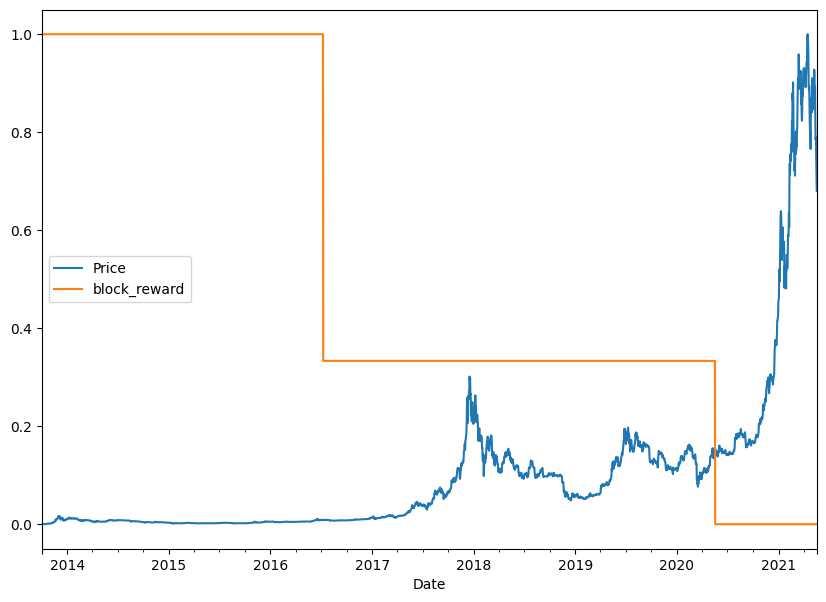

In [95]:
from sklearn.preprocessing import minmax_scale
scaled_prices_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[['Price', "block_reward"]]),
                                                  columns=bitcoin_prices_block.columns,
                                                  index=bitcoin_prices_block.index)
scaled_prices_block_df.plot(figsize=(10,7))

### Make windowed dataset of multivariate data

In [96]:
WINDOW_SIZE = 7
HORIZON = 1
bitcoin_prices_windows = bitcoin_prices_block.copy()

for i in range(WINDOW_SIZE): #7
  bitcoin_prices_windows[f'Price +{i+1}'] = bitcoin_prices_windows['Price'].shift(periods=i+1)
bitcoin_prices_windows.head(10)

,Price,block_reward,Price +1,Price +2,Price +3,Price +4,Price +5,Price +6,Price +7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


what we have done is created a way to window our dataset dirctly form a pandas dataframe

```
[0 ,1, 2, 3, 4, 5, 6, block_reward] --> [7]
[1, 2, 3, 4, 5, 6, 7, block_reward] --> [8]
[2, 3, 4, 5, 6, 7, 8, block_reward] --> [9]

```

In [97]:
# Create x and y
X = bitcoin_prices_windows.dropna().drop('Price', axis=1).astype(np.float32)
y = bitcoin_prices_windows.dropna()['Price'].astype(np.float32)

In [98]:
train_windows_block, test_windows_block, train_labels_block, test_labels_block = make_train_test_splits(X, y)

In [99]:
len(train_windows_block), len(train_labels_block), len(test_windows_block), len(test_labels_block)

(2224, 2224, 556, 556)

## Model 6: Multivariate dataset

In [100]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(1)
], name='model_6_Dense')

model_6.compile(loss='mae',
                optimizer=Adam())
model_6.fit(train_windows_block,
            train_labels_block,
            batch_size=128,
            epochs=100,
            validation_data=(test_windows_block, test_labels_block),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 15s - loss: 3318.2458

18/18 [==============================] - 2s 37ms/step - loss: 1307.8312 - val_loss: 3067.2820
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 457.3510

18/18 [==============================] - 1s 30ms/step - loss: 342.7443 - val_loss: 1346.9541
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 171.8267

18/18 [==============================] - 0s 28ms/step - loss: 195.5068 - val_loss: 1120.3159
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 228.4776

18/18 [==============================] - 0s 28ms/step - loss: 179.3526 - val_loss: 965.7053
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 178.8734

18/18 [==============================] - 0s 29ms/step - loss: 172.3601 - val_loss: 959.6403
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 125.1091

18/18 [==============================] - 0s 28ms/step - loss: 166.7702 - val_loss: 914.2496
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 199.7627

18/18 [==============================] - 1s 29ms/step - loss: 160.3422 - val_loss: 890.5925
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 130.8643

18/18 [==============================] - 0s 28ms/step - loss: 155.4345 - val_loss: 860.1537
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 131.9127

18/18 [==============================] - 1s 31ms/step - loss: 153.7573 - val_loss: 830.9517
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 156.6568

18/18 [==============================] - 1s 29ms/step - loss: 148.3023 - val_loss: 806.6932
Epoch 11/100
18/18 [==============================] - 0s 5ms/step - loss: 142.6213 - val_loss: 815.7486
Epoch 12/100
 1/18 [>.............................] - ETA: 0s - loss: 135.7754

18/18 [==============================] - 1s 38ms/step - loss: 139.6622 - val_loss: 793.5515
Epoch 13/100
15/18 [========================>.....] - ETA: 0s - loss: 134.6223

18/18 [==============================] - 1s 40ms/step - loss: 135.9090 - val_loss: 778.5810
Epoch 14/100
15/18 [========================>.....] - ETA: 0s - loss: 129.6609

18/18 [==============================] - 1s 40ms/step - loss: 131.9310 - val_loss: 740.2518
Epoch 15/100
16/18 [=========================>....] - ETA: 0s - loss: 136.0529

18/18 [==============================] - 1s 55ms/step - loss: 134.0515 - val_loss: 727.8114
Epoch 16/100
18/18 [==============================] - 0s 5ms/step - loss: 127.4669 - val_loss: 748.5021
Epoch 17/100
18/18 [==============================] - 0s 4ms/step - loss: 124.4223 - val_loss: 763.9891
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 138.6449

18/18 [==============================] - 1s 29ms/step - loss: 124.0461 - val_loss: 675.8719
Epoch 19/100
18/18 [==============================] - ETA: 0s - loss: 119.5405

18/18 [==============================] - 0s 28ms/step - loss: 119.5405 - val_loss: 671.8569
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 127.6686

18/18 [==============================] - 0s 29ms/step - loss: 118.0196 - val_loss: 660.2723
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 149.2932

18/18 [==============================] - 0s 29ms/step - loss: 120.9662 - val_loss: 634.9663
Epoch 22/100
18/18 [==============================] - 0s 5ms/step - loss: 115.5440 - val_loss: 637.4185
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 113.9903

18/18 [==============================] - 0s 29ms/step - loss: 115.1051 - val_loss: 621.0311
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 123.4776

18/18 [==============================] - 1s 29ms/step - loss: 114.1398 - val_loss: 619.4880
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 122.2668

18/18 [==============================] - 1s 30ms/step - loss: 112.5816 - val_loss: 605.5125
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 108.1815

18/18 [==============================] - 0s 29ms/step - loss: 112.1355 - val_loss: 601.1154
Epoch 27/100
18/18 [==============================] - 0s 5ms/step - loss: 112.4172 - val_loss: 633.7625
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 106.8549

18/18 [==============================] - 1s 29ms/step - loss: 111.3483 - val_loss: 594.9354
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 106.5225

18/18 [==============================] - 0s 29ms/step - loss: 110.6434 - val_loss: 590.3152
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 123.3003

18/18 [==============================] - 0s 29ms/step - loss: 117.6260 - val_loss: 586.3596
Epoch 31/100
18/18 [==============================] - 0s 4ms/step - loss: 108.5031 - val_loss: 612.8129
Epoch 32/100
18/18 [==============================] - 0s 4ms/step - loss: 109.4268 - val_loss: 600.2709
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 109.7332 - val_loss: 595.6393
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 133.2902

18/18 [==============================] - 0s 27ms/step - loss: 109.2620 - val_loss: 579.8057
Epoch 35/100
17/18 [===========================>..] - ETA: 0s - loss: 108.5383

18/18 [==============================] - 1s 29ms/step - loss: 108.1498 - val_loss: 578.2869
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 152.0767

18/18 [==============================] - 0s 29ms/step - loss: 111.5150 - val_loss: 576.1063
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 125.6040

18/18 [==============================] - 1s 29ms/step - loss: 107.6942 - val_loss: 574.2460
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 109.8311 - val_loss: 591.7363
Epoch 39/100
18/18 [==============================] - 0s 4ms/step - loss: 108.1019 - val_loss: 577.6740
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 105.9396

18/18 [==============================] - 1s 30ms/step - loss: 107.3263 - val_loss: 570.8948
Epoch 41/100
 1/18 [>.............................] - ETA: 0s - loss: 98.4900

18/18 [==============================] - 0s 28ms/step - loss: 107.4687 - val_loss: 570.8812
Epoch 42/100
18/18 [==============================] - 0s 4ms/step - loss: 115.3867 - val_loss: 615.9634
Epoch 43/100
18/18 [==============================] - 0s 8ms/step - loss: 115.2743 - val_loss: 647.7404
Epoch 44/100
15/18 [========================>.....] - ETA: 0s - loss: 109.5978

18/18 [==============================] - 1s 41ms/step - loss: 109.6240 - val_loss: 570.2493
Epoch 45/100
14/18 [======================>.......] - ETA: 0s - loss: 104.8772

18/18 [==============================] - 1s 40ms/step - loss: 106.3651 - val_loss: 568.8725
Epoch 46/100
18/18 [==============================] - 0s 6ms/step - loss: 110.5976 - val_loss: 570.8235
Epoch 47/100
18/18 [==============================] - 0s 7ms/step - loss: 110.4676 - val_loss: 602.0896
Epoch 48/100
18/18 [==============================] - 0s 7ms/step - loss: 108.3472 - val_loss: 607.6503
Epoch 49/100
15/18 [========================>.....] - ETA: 0s - loss: 113.4425

18/18 [==============================] - 1s 35ms/step - loss: 113.1120 - val_loss: 568.3221
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 110.6755 - val_loss: 680.0032
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 112.3889 - val_loss: 575.9443
Epoch 52/100
18/18 [==============================] - 0s 4ms/step - loss: 111.1982 - val_loss: 584.5079
Epoch 53/100
18/18 [==============================] - 0s 4ms/step - loss: 108.6494 - val_loss: 616.4114
Epoch 54/100
18/18 [==============================] - ETA: 0s - loss: 108.4122

18/18 [==============================] - 1s 51ms/step - loss: 108.4122 - val_loss: 565.4938
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 108.1379 - val_loss: 572.1956
Epoch 56/100
18/18 [==============================] - 0s 4ms/step - loss: 106.5582 - val_loss: 751.6182
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 114.1844 - val_loss: 592.1756
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 110.9977 - val_loss: 583.7229
Epoch 59/100
18/18 [==============================] - 0s 4ms/step - loss: 106.5605 - val_loss: 610.0681
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 114.4297 - val_loss: 705.9194
Epoch 61/100
18/18 [==============================] - 0s 4ms/step - loss: 117.1638 - val_loss: 623.1360
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 111.3758 - val_loss: 586.4165
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 11

18/18 [==============================] - 1s 29ms/step - loss: 112.9369 - val_loss: 563.2579
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 105.4463 - val_loss: 571.7425
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 106.1066 - val_loss: 569.5948
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 105.3140 - val_loss: 581.8246
Epoch 88/100
18/18 [==============================] - 0s 4ms/step - loss: 105.9471 - val_loss: 568.7925
Epoch 89/100
18/18 [==============================] - 0s 4ms/step - loss: 105.0183 - val_loss: 567.4440
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 105.4395 - val_loss: 609.1403
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 113.3170 - val_loss: 671.7283
Epoch 92/100
18/18 [==============================] - 0s 4ms/step - loss: 108.7130 - val_loss: 566.0184
Epoch 93/100
18/18 [==============================] - 0s 5ms/step - loss: 11

In [101]:
model_6.evaluate(test_windows_block, test_labels_block)

18/18 [==============================] - 0s 2ms/step - loss: 674.7325


674.7324829101562

In [102]:
model_6 = tf.keras.models.load_model('/content/model_experiments/model_6_Dense')
model_6.evaluate(test_windows_block, test_labels_block)

18/18 [==============================] - 0s 2ms/step - loss: 563.2581


563.258056640625

### Challange

build tow models, one for prices and one for block_reward

In [148]:
## first prepare the data set to the hybrid model
X_hybrid = bitcoin_prices_windows.dropna().drop(['Price', 'block_reward'], axis=1).astype(np.float32)
block_reward = bitcoin_prices_windows['block_reward'].dropna().astype(np.float32)
block_reward = block_reward.iloc[7:]
y_hybrid = bitcoin_prices_windows['Price']
y_hybrid = y_hybrid.iloc[7:]

In [104]:
input_windows = layers.Input(shape=(7,), dtype='float32')
x_windows = layers.Dense(128, activation='relu')(input_windows)
output_windows = layers.Dense(1)(x_windows)
model_windows= tf.keras.Model(input_windows, output_windows, name='model_windows')

input_block = layers.Input(shape=(1,), dtype='float32')
x_block = layers.Dense(128, activation='relu')(input_block)
output_block = layers.Dense(1)(x_block)
model_block = tf.keras.Model(input_block, output_block, name='model_block')

concatenate = layers.Concatenate(name='concate')([model_windows.output,
                                                        model_block.output])

output_layer = layers.Dense(1)(concatenate)

model_challange = tf.keras.Model(inputs=[input_windows, input_block],
                                 outputs=output_layer,
                                 name='hybrid_model_challange')

In [105]:
model_challange.compile(loss='mae',
                        optimizer=Adam())

In [106]:
X_hybrid.ndim

2

In [107]:
block_reward = np.expand_dims(block_reward, axis=1)

In [108]:
block_reward.ndim

2

In [109]:
X_hybrid = np.expand_dims(X_hybrid, axis=1)

In [110]:
block_reward

array([[25.  ],
       [25.  ],
       [25.  ],
       ...,
       [ 6.25],
       [ 6.25],
       [ 6.25]], dtype=float32)

In [111]:
input_x = tf.data.Dataset.from_tensor_slices(((X_hybrid, block_reward), y_hybrid))

In [112]:
#model_challange.fit(input_x,
#                   batch_size=128,
#                   epochs=100,
#                   callbacks=[create_model_checkpoint(model_name=model_challange.name)])

In [113]:
#model_challange.summary()

## Model 7: N-BEATS

https://arxiv.org/pdf/1905.10437.pdf

### building and testing the N-BEATS block layer



In [114]:
# Create the N-BEATS block layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size  #will be recived from the class
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neruons = n_neurons
    self.n_layers = n_layers

    # Create a stack of fully concted layers each has Relu activation function
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation='relu') for _ in range(n_layers)]
    # The output of the block is theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation='linear', name='theta')

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)  #x will continualy updated as it pass at each layer in fully concted stack
    theta = self.theta_layer(x)
    # output the backcast and the forcast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [115]:
# Set up a dummy NBeatsBlock layer to represent the inputs and the outputs
WINDOW_SIZE = 7
HORIZON = 1
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE + HORIZON, #the backcast and the forecast
                                       horizon=HORIZON,
                                       n_neurons=128, #Width
                                       n_layers=4)

In [116]:
# Create a dummy input  (the input have to have ths=e same size as the input_size)
dummy_input = tf.expand_dims(tf.range(WINDOW_SIZE)+1, axis=0)  #the expand for the batch size
dummy_input

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [117]:
# Pass the dummy_input to the nbeats_layer
backcast, forecast = dummy_nbeats_block_layer(dummy_input)
backcast.numpy(), forecast.numpy()

(array([[-0.41589224,  0.26393986, -0.09681621,  0.39895955, -0.9505633 ,
         -0.25081956,  0.1439279 ]], dtype=float32),
 array([[0.533565]], dtype=float32))

In [118]:
dummy_nbeats_block_layer

### preparing the data using `tf.data`

In [119]:
WINDOW_SIZE = 7
HORIZON = 1

In [120]:
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f'Price+{i+1}'] = bitcoin_prices_nbeats['Price'].shift(periods=i+1)
bitcoin_prices_nbeats[:10]

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [121]:
X = bitcoin_prices_nbeats.dropna().drop('Price', axis=1)
y = bitcoin_prices_nbeats.dropna()['Price']

In [122]:
split_size = int(len(X) * 0.8)
X_nbeats_train, y_nbeats_train = X[:split_size], y[:split_size]
X_nbeats_test, y_nbeats_test = X[split_size:], y[split_size:]

In [123]:
len(X_nbeats_train), len(y_nbeats_train), len(X_nbeats_test), len(y_nbeats_test)

(2224, 2224, 556, 556)

In [124]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_nbeats_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_nbeats_train)
test_features_dataset = tf.data.Dataset.from_tensor_slices(X_nbeats_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_nbeats_test)

train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset)).batch(batch_size=1024).prefetch(tf.data.AUTOTUNE) #tf.AUTOTUNE determn the ideal number of CPU to prefetch the data
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset)).batch(1024).prefetch(tf.data.AUTOTUNE)

In [125]:
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON   #number of hidding unites in theta layer

INPUT_SIZE, THETA_SIZE

(7, 8)

### get ready for residual connections

In [126]:
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Addition
added = layers.add([tensor_1, tensor_2])

print(f"The input tensors is: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

The input tensors is: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


### Building, Compiling and Fitting the N-BEATS

In [127]:
%%time
tf.random.set_seed(42)
# 1. NBeatesBlock
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name='InitialBlock')
#2. Create input to stack
stack_input = layers.Input(shape=(INPUT_SIZE), name='stack_input')

# 3. Create initial bachcast and forcast input
residual, forecast = nbeats_block_layer(stack_input)

# 4. Create a stack of Block layers
for i, _ in enumerate(range(N_STACKS-1)):

  # 5. Use the NBeatsBlock layer to calculate the backcast as well as forecast
  backcast, block_forecast = NBeatsBlock(input_size=INPUT_SIZE,
                                         theta_size=THETA_SIZE,
                                         horizon=HORIZON,
                                         n_neurons=N_NEURONS,
                                         n_layers=N_LAYERS,
                                         name=f'NBeatsBlock_{i}')(residual)

  # 6. Create the double residual stacking
  residual = layers.subtract([residual, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name="model_7_NBeats")

# 8. compile model
model_7.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

# 9. fit
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                        patience=200, #if the models dosen't improve for 200 epochs it's going to stop training and restore it's best weights
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                            patience=100, #if the model dosn't improve in 100 epochs it going to reduce the learning rate by 0.1
                                                            verbose=1)])

Epoch 1/5000
3/3 [==============================] - 57s 875ms/step - loss: 1462.5536 - val_loss: 9025.0322 - lr: 0.0010
Epoch 2/5000
3/3 [==============================] - 0s 78ms/step - loss: 966.7881 - val_loss: 15768.2627 - lr: 0.0010
Epoch 3/5000
3/3 [==============================] - 0s 62ms/step - loss: 2025.5056 - val_loss: 11621.0176 - lr: 0.0010
Epoch 4/5000
3/3 [==============================] - 0s 68ms/step - loss: 2500.5020 - val_loss: 15676.7842 - lr: 0.0010
Epoch 5/5000
3/3 [==============================] - 0s 127ms/step - loss: 2230.5322 - val_loss: 8076.9521 - lr: 0.0010
Epoch 6/5000
3/3 [==============================] - 0s 136ms/step - loss: 1058.2141 - val_loss: 1046.7655 - lr: 0.0010
Epoch 7/5000
3/3 [==============================] - 0s 64ms/step - loss: 1046.4293 - val_loss: 7606.0322 - lr: 0.0010
Epoch 8/5000
3/3 [==============================] - 0s 60ms/step - loss: 966.9843 - val_loss: 3778.7622 - lr: 0.0010
Epoch 9/5000
3/3 [==============================] -

In [128]:
model_7_pred = make_pred(model_7, test_dataset)
model_7_results = evaluate_preds(y_nbeats_test,
                                 model_7_pred)
model_7_results

1/1 [==============================] - 1s 1s/step


{'mae': 570.4052,
 'mse': 1159778.9,
 'rmse': 1076.9303,
 'mape': 2.5809093,
 'mase': 1.002044}

In [129]:
model_1_results

{'mae': 585.1086,
 'mse': 1221030.0,
 'rmse': 1105.0022,
 'mape': 2.621584,
 'mase': 1.0278738}

### Plot the NBeats architecture

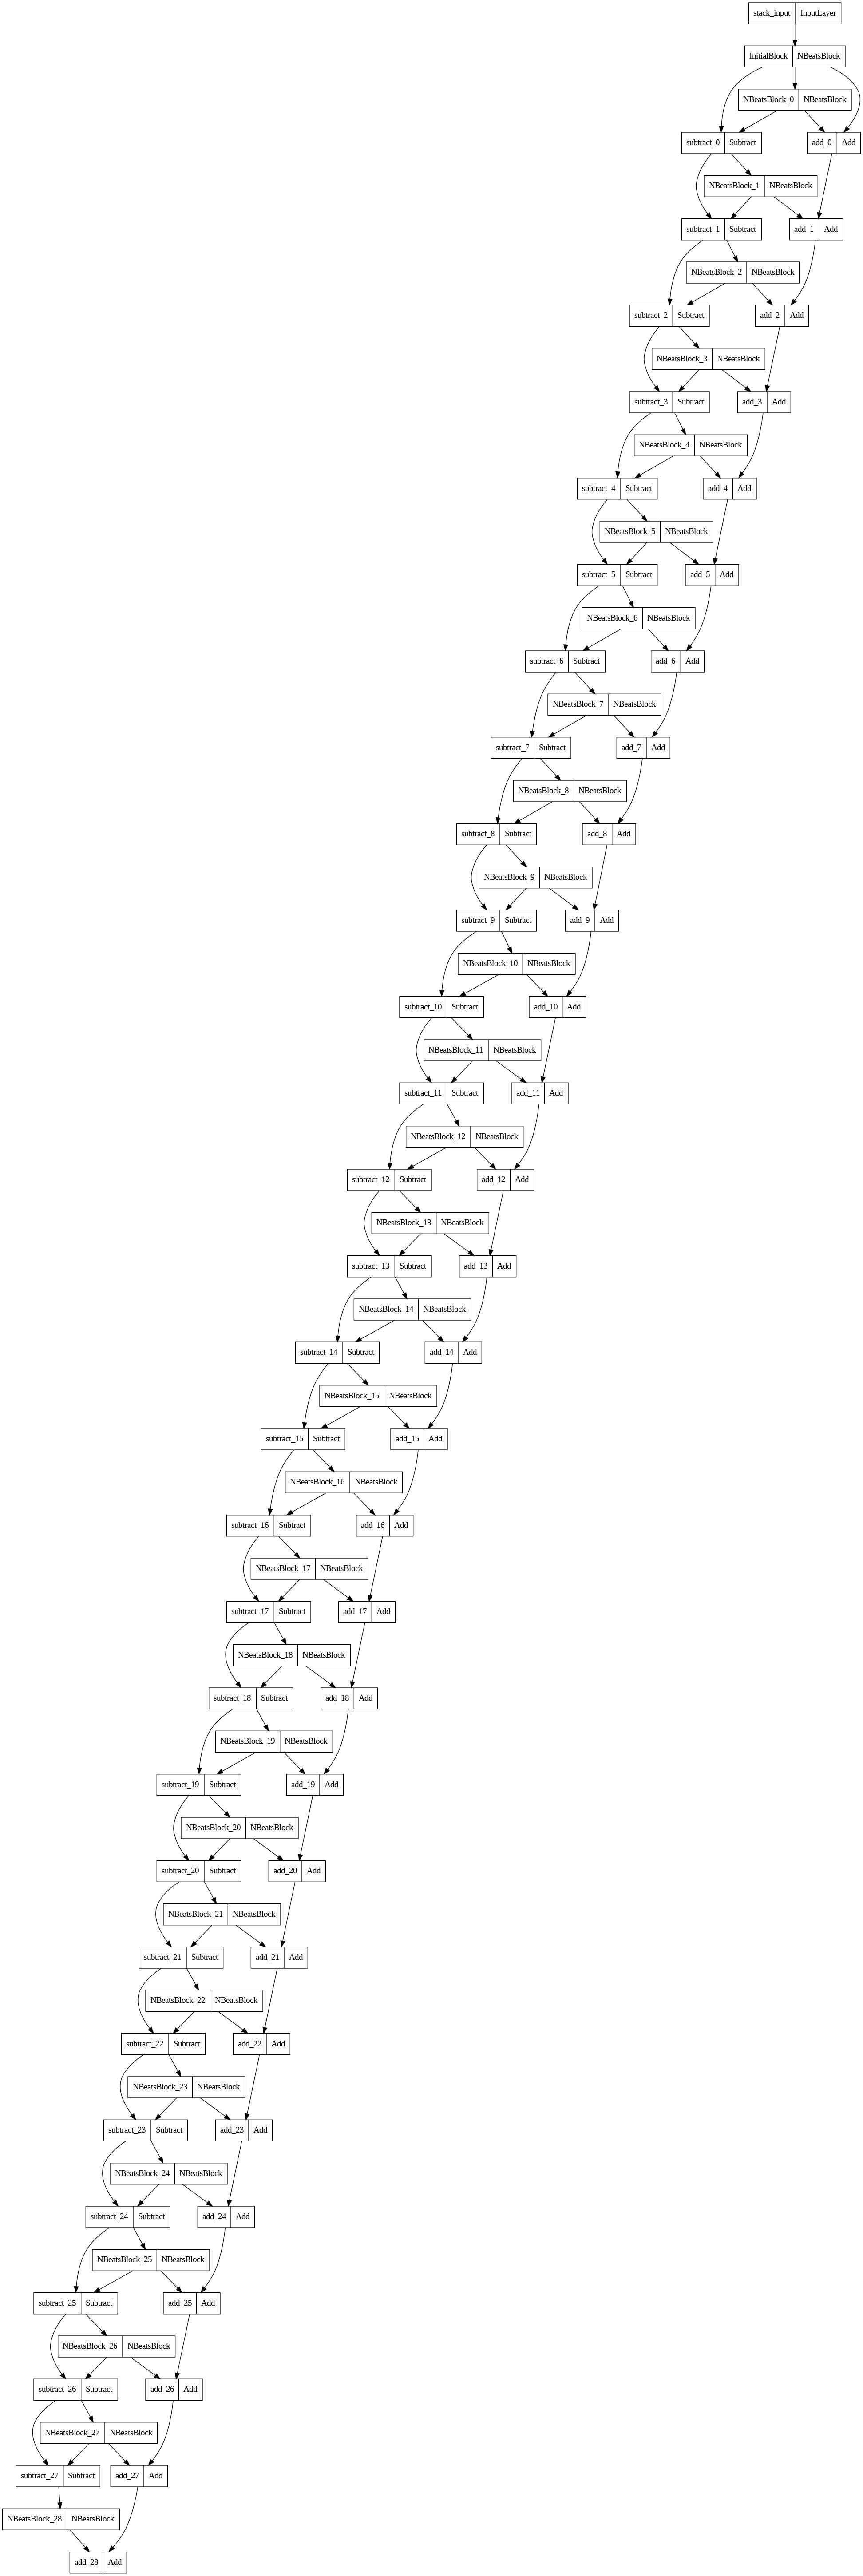

In [130]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: Ensemble

Combines defferent models together to predict a common goal.

In [131]:
WINDOW_SIZE, HORIZON

(7, 1)

### Build an Ensemble model

In [165]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10, #who many defferent models are going to train per loss function
                        num_epochs=1000,
                        loss_fn=['mae', 'mse', 'mape']):
  # Make empty list for ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss fuction
  for i in range(num_iter):
    for loss_function in loss_fn:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")
      # Construct a simple model(similar to model_1)
      model = tf.keras.Sequential([
          layers.Dense(128, kernel_initializer='he_normal', activation='relu'),
          layers.Dense(128, kernel_initializer='he_normal', activation='relu'),
          layers.Dense(HORIZON)
      ])
      # Compile the model
      model.compile(loss=loss_function,
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['mae','mse'])
      # Fit the model
      model.fit(train_dataset,
              epochs=num_epochs,
              verbose=0,
              validation_data=test_dataset,
              callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                          patience=200,
                                                          restore_best_weights=True),
                         tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                              patience=200,
                                                              verbose=1)])
      # Append fitted model to the list of ensemble mdoels
      ensemble_models.append(model)
  return ensemble_models

In [166]:
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 989: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 766: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 544: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 539: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 421: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mape for 1000 epochs, model number: 1

Epoch 334: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mae for 1000 epochs, model number: 2
Optimizing model by reducing: mse for 1000 epochs

In [167]:
ensemble_models

### Make prediction using Ensemble models

In [168]:
def make_ensemble_pred(ensembel_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds=model.predict(data)
    ensemble_preds.append(preds)

  return tf.constant(tf.squeeze(ensemble_preds))

In [169]:
ensemble_pred = make_ensemble_pred(ensemble_models, test_dataset)
ensemble_pred

1/1 [==============================] - 0s 41ms/step


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8805.164,  8761.436,  9126.692, ..., 50105.42 , 49099.695,
        45946.7  ],
       [ 8696.436,  8830.443,  9174.58 , ..., 49551.793, 47946.625,
        45843.367],
       [ 8753.547,  8781.498,  9070.421, ..., 50236.273, 48027.117,
        46315.773],
       ...,
       [ 8787.545,  8775.609,  8995.924, ..., 49504.145, 48633.273,
        46026.965],
       [ 8787.789,  8795.295,  9012.457, ..., 49898.348, 48637.33 ,
        46130.484],
       [ 8851.41 ,  8904.433,  8972.054, ..., 49701.79 , 47763.516,
        47430.38 ]], dtype=float32)>

In [170]:
ensemble_mean = tf.reduce_mean(ensemble_pred, axis=0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8769.184, 8779.889, 9041.607, 8700.995, 8758.843, 8704.157,
       8629.672, 8493.921, 8440.641, 8507.206], dtype=float32)>

In [171]:
ensemble_results = evaluate_preds(y_nbeats_test,
                                  ensemble_mean)
ensemble_results

{'mae': 564.3326,
 'mse': 1130402.1,
 'rmse': 1063.2037,
 'mape': 2.5619519,
 'mase': 0.99137604}

## Model 9: Train a model to predict into actual future

In [160]:
bitcoin_prices_windows.tail(10)

,Price,block_reward,Price +1,Price +2,Price +3,Price +4,Price +5,Price +6,Price +7
Date,,,,,,,,,
2021-05-09,58788.209679,6.25,57107.120672,56583.849879,57252.702185,53658.843121,57255.306838,56427.043125,57677.975222
2021-05-10,58102.191426,6.25,58788.209679,57107.120672,56583.849879,57252.702185,53658.843121,57255.306838,56427.043125
2021-05-11,55715.546651,6.25,58102.191426,58788.209679,57107.120672,56583.849879,57252.702185,53658.843121,57255.306838
2021-05-12,56573.555472,6.25,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879,57252.702185,53658.843121
2021-05-13,52147.821187,6.25,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879,57252.702185
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426


In [149]:
X_all = bitcoin_prices_windows.dropna().drop(["Price", "block_reward"], axis=1).to_numpy()
y_all = bitcoin_prices_windows.dropna()["Price"].to_numpy()

len(X_all), len(y_all)

(2780, 2780)

In [150]:
# Turn our data to tf.dataset
features_data_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_data_all = tf.data.Dataset.from_tensor_slices(y_all)

dataset_all = tf.data.Dataset.zip((features_data_all, labels_data_all)).batch(1024).prefetch(tf.data.AUTOTUNE)
dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [153]:
# Create a model
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
])

model_9.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())
model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

In [157]:
INTO_FUTURE = 14  # Steps in future that will be predict

In [162]:
# Create a fuction to make prediction into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE):
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  for _ in range(INTO_FUTURE):
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on:\n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")
    # Appen to the list
    future_forecast.append(tf.squeeze(future_pred).numpy())

    # Update last window
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [163]:
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 115ms/step
Predicting on:
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55910.50390625

1/1 [==============================] - 0s 30ms/step
Predicting on:
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55910.50390625] -> Prediction: 51504.703125

1/1 [==============================] - 0s 31ms/step
Predicting on:
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55910.50390625 51504.703125  ] -> Prediction: 49865.53515625

1/1 [==============================] - 0s 33ms/step
Predicting on:
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55910.50390625 51504.703125   49865.53515625] -> Prediction: 50330.625

1/1 [==============================] - 0s 32ms/step
Predicting on:
 [47885.62525472 45604.61575361 43144.47129086 55910.50390625
 51504.703125   49865.53515625 50330.625     ] ->

In [164]:
future_forecast

[55910.504,
 51504.703,
 49865.535,
 50330.625,
 46049.086,
 44932.4,
 45804.047,
 54994.473,
 51237.28,
 50032.84,
 49798.21,
 44614.113,
 44886.062,
 47595.105]

In [172]:
# Plot future forecast

## Model 10: turkey problem